# <span style = "color: green"> Employee attrition Classification </span>

***

The issue of keeping one's employees happy and satisfied is a perennial and age-old challenge. If an employee you have invested so much time and money leaves for "greener pastures", then this would mean that you would have to spend even more time and money to hire somebody else. In the spirit of Kaggle, let us therefore turn to our predictive modelling capabilities and see if we can predict employee attrition on this synthetically generated IBM dataset.

### Let's Dive into it

#### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'HR-Employee-Attrition.csv' dataset and store it inside a variable

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')

### Check head

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Check last 5 rows

In [5]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


### Check shape

In [6]:
df.shape

(1470, 35)

### View info about the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### View basic statistical information about the dataset

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Check for null values

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### View unique values in all categorical columns

In [10]:
for col in df.columns:
    print(f'unique value in {col}',df[col].unique())

unique value in Age [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
unique value in Attrition ['Yes' 'No']
unique value in BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
unique value in DailyRate [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  

In [11]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Check the number of unique values in all columns

In [12]:
for col in df.columns:
    print(f'unique value in {col}',df[col].nunique())

unique value in Age 43
unique value in Attrition 2
unique value in BusinessTravel 3
unique value in DailyRate 886
unique value in Department 3
unique value in DistanceFromHome 29
unique value in Education 5
unique value in EducationField 6
unique value in EmployeeCount 1
unique value in EmployeeNumber 1470
unique value in EnvironmentSatisfaction 4
unique value in Gender 2
unique value in HourlyRate 71
unique value in JobInvolvement 4
unique value in JobLevel 5
unique value in JobRole 9
unique value in JobSatisfaction 4
unique value in MaritalStatus 3
unique value in MonthlyIncome 1349
unique value in MonthlyRate 1427
unique value in NumCompaniesWorked 10
unique value in Over18 1
unique value in OverTime 2
unique value in PercentSalaryHike 15
unique value in PerformanceRating 2
unique value in RelationshipSatisfaction 4
unique value in StandardHours 1
unique value in StockOptionLevel 4
unique value in TotalWorkingYears 40
unique value in TrainingTimesLastYear 7
unique value in WorkLifeB

### Print out the names of the columns having only one unique values 

In [13]:
for col in df.columns:
    unique = df[col].nunique()
    if unique==1:
        print(col) 

EmployeeCount
Over18
StandardHours


In [14]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Drop these columns as they won't be useful in our predicition

In [15]:
df.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

In [16]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


### Drop EmployeeNumber column aswell

In [17]:
df.drop(['EmployeeNumber'],axis=1,inplace=True)

### Create following groupby valuecounts

In [18]:
df.groupby(['Department','EducationField','Gender']).size()

Department              EducationField    Gender
Human Resources         Human Resources   Female      8
                                          Male       19
                        Life Sciences     Female      9
                                          Male        7
                        Medical           Female      2
                                          Male       11
                        Other             Male        3
                        Technical Degree  Female      1
                                          Male        3
Research & Development  Life Sciences     Female    166
                                          Male      274
                        Medical           Female    152
                                          Male      211
                        Other             Female     25
                                          Male       39
                        Technical Degree  Female     36
                                          Male       58

# <span style = "color: orange"> Data Visualization </span>

### Plot the following

Text(0, 0.5, 'Number of employees')

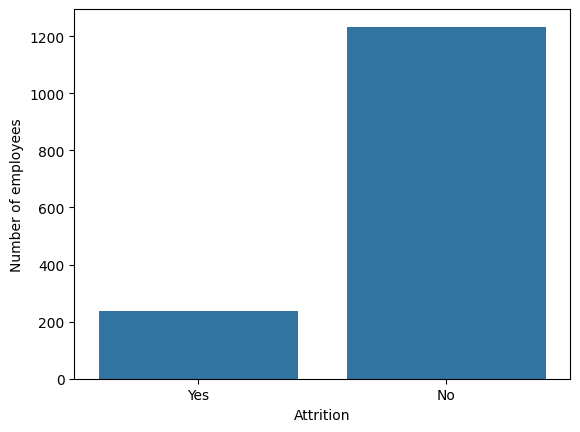

In [19]:
sns.countplot(x='Attrition',data=df)
plt.ylabel('Number of employees')

Text(0, 0.5, 'Number of employees')

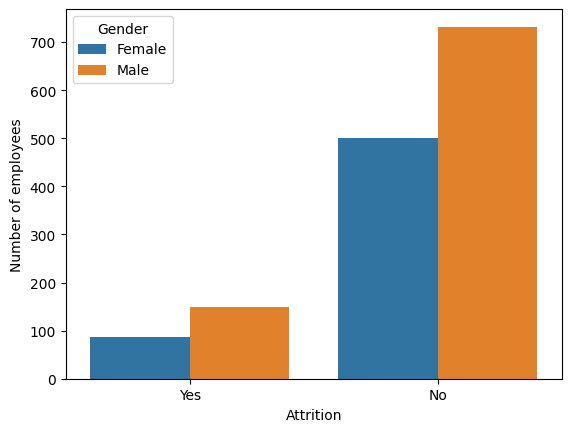

In [20]:
sns.countplot(x='Attrition',data=df,hue='Gender')
plt.ylabel('Number of employees')

Text(0, 0.5, 'Number of employees')

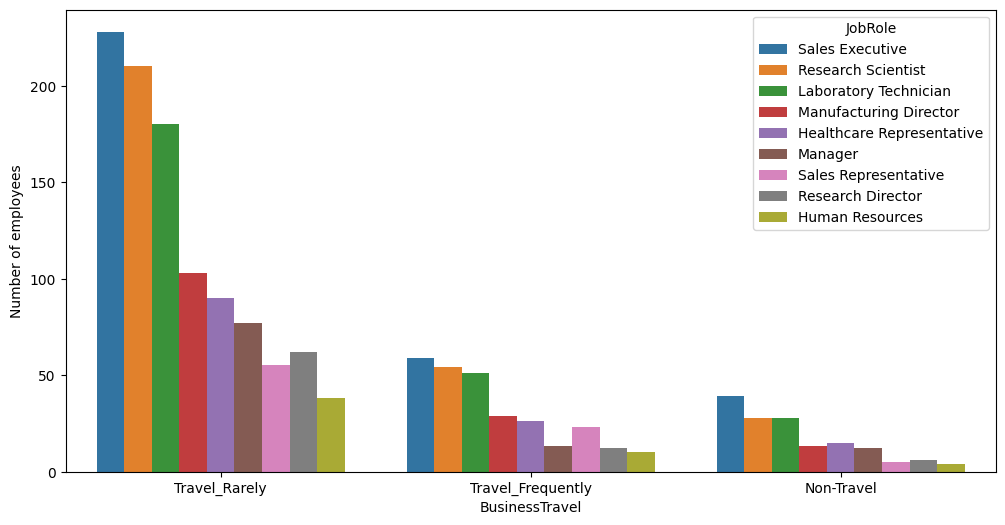

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x='BusinessTravel',data=df,hue='JobRole')
plt.ylabel('Number of employees')

<Axes: xlabel='OverTime', ylabel='count'>

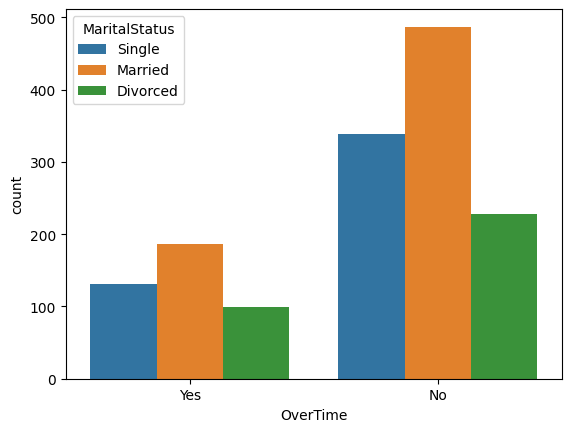

In [22]:
sns.countplot(x='OverTime',data=df,hue='MaritalStatus')


<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

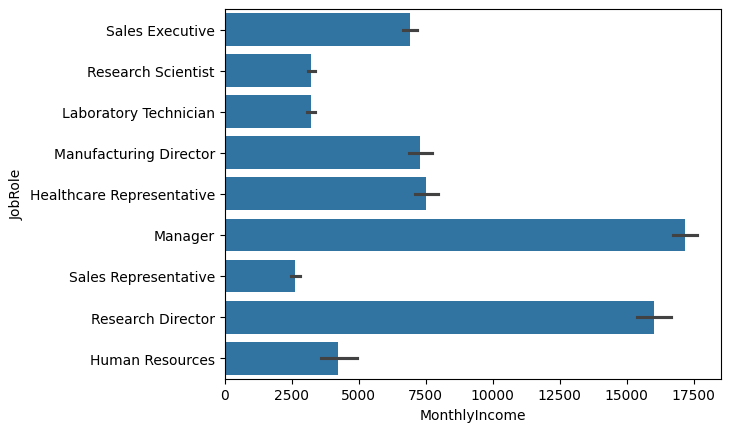

In [23]:
sns.barplot(x='MonthlyIncome',y='JobRole',data=df)

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

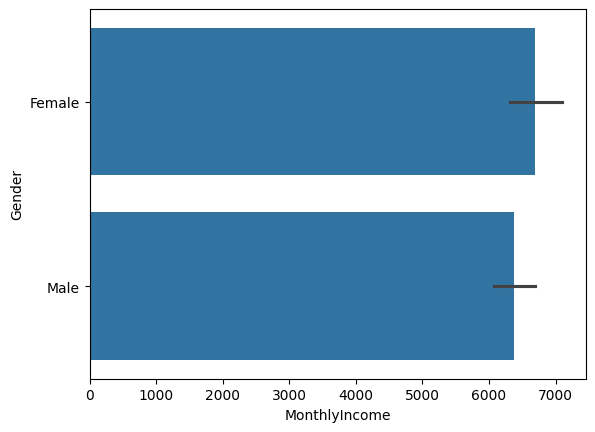

In [24]:
sns.barplot(x='MonthlyIncome',y='Gender',data=df)

<Axes: xlabel='MonthlyIncome', ylabel='EducationField'>

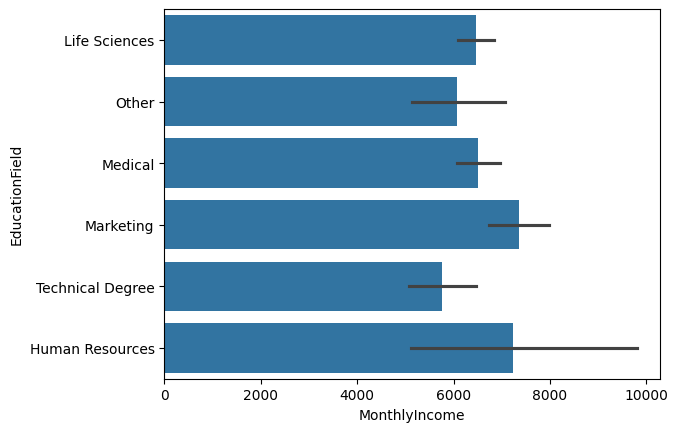

In [25]:
sns.barplot(x='MonthlyIncome',y='EducationField',data=df)

<Axes: xlabel='JobSatisfaction', ylabel='count'>

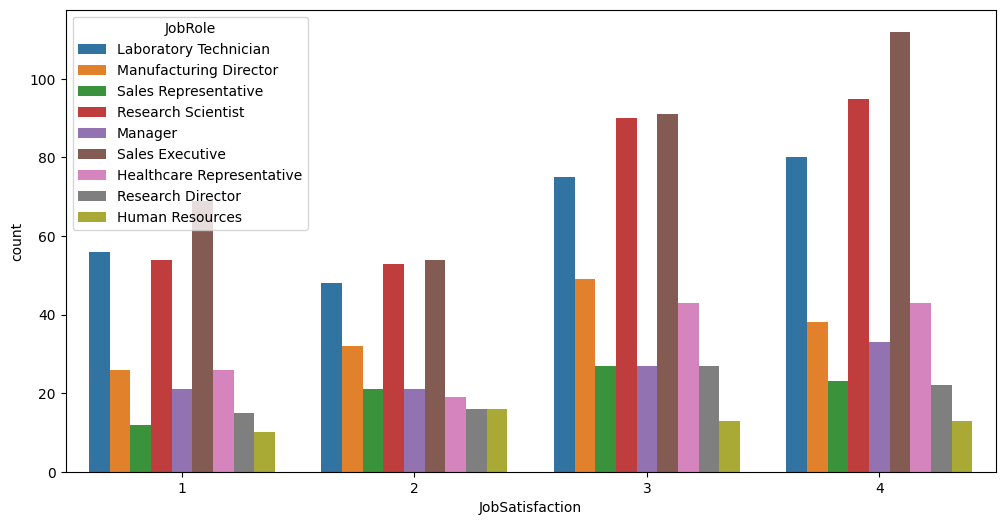

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x='JobSatisfaction',data=df,hue='JobRole')

<Axes: xlabel='Age', ylabel='Count'>

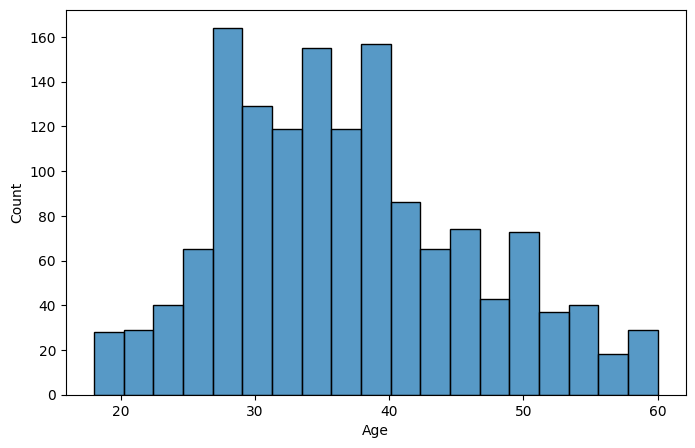

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(x='Age',data=df)

### Data Preprocessing

#### Convert Attrition from ('Yes', 'No') to (1,0) 

In [28]:
df['Attrition']=df['Attrition'].map({'Yes':1,'No':0})

In [29]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


### Convert the rest of the categorical values into numeric using dummy variables and store the results in a new dataframe called 'newdf'

In [30]:
new_df = pd.get_dummies(df,dtype=int,drop_first=True)

In [31]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    new_df[col] = lb.fit_transform(df[col])

In [32]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


#### Check the shape of our new dataset

In [33]:
df.shape

(1470, 31)

#### Print unique values in our new dataframe

In [34]:
for col in new_df.columns:
    print (f'Unique values in {col} are',new_df[col].unique())

Unique values in Age are [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Unique values in Attrition are [1 0]
Unique values in DailyRate are [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145

#### Split the columns into input and target variables (X and y)

In [35]:
X = df.drop(columns=('Attrition'),axis=1)
y = df['Attrition']

#### Carry out Feature scaling using StandardScaler

In [36]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

In [37]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = lb.fit_transform(df[col])

In [38]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [39]:
X = pd.DataFrame(st.fit_transform(X),columns=st.get_feature_names_out())

In [40]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-0.660531,-1.224745,1.383138,0.379672,-0.057788,1.032716,1.153254,1.236820,-0.108350,0.726020,2.125136,1.591746,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.254625,0.816497,-0.240677,-1.026167,-0.057788,0.626374,-0.660853,-0.133282,-0.291719,1.488876,-0.678049,-0.628241,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,1.169781,0.816497,1.284725,-1.026167,-0.961486,-0.998992,0.246200,1.236820,-0.937654,-1.674841,1.324226,1.591746,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,1.169781,-1.224745,-0.486709,0.379672,-0.961486,0.626374,0.246200,-0.133282,-0.763634,1.243211,-0.678049,1.591746,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.575686,0.816497,-1.274014,0.379672,-0.961486,-0.998992,-0.660853,-0.133282,-0.644858,0.325900,2.525591,-0.628241,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


### Split the dataset into training and testing set

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

## Machine Learning Models

### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [44]:
lr = LogisticRegression()
lr.fit(X_test,y_test)

LogisticRegression()

In [45]:
y_pred = lr.predict(X_test)


In [46]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
scores = cross_val_score(lr, X, y, cv=5)*100
scores=np.average(scores)
print(scores)

0.8843537414965986
[[365   6]
 [ 45  25]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       371
           1       0.81      0.36      0.50        70

    accuracy                           0.88       441
   macro avg       0.85      0.67      0.71       441
weighted avg       0.88      0.88      0.86       441

86.5986394557823


<span style = "color:orange"> Visualize confusion matrix </span>

<Axes: >

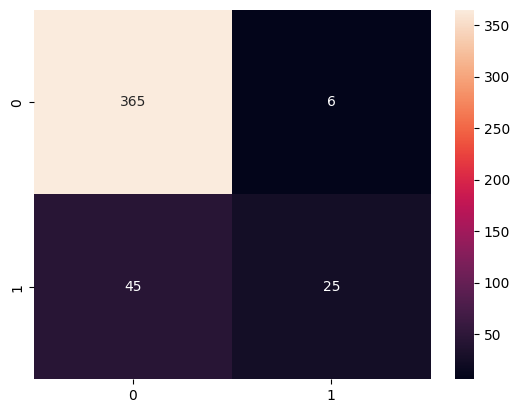

In [47]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Random Forest Classifier
** Choose the best estimator and parameters :GridSearchCV**

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rr = RandomForestClassifier()

In [49]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(rr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [50]:
print('Best estimator is :',grid_search.best_estimator_)
print('Best parameter is :',grid_search.best_params_)
print('Best score is :',grid_search.score(X_train,y_train))
best=grid_search.best_estimator_
y_pred = best.predict(X_test)


Best estimator is : RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50)
Best parameter is : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best score is : 0.9747327502429544


<span style = "color:blue"> Create Random forest model with the best parameters </span>

In [51]:
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier(n_estimators=20)
r.fit(X_test,y_test)

RandomForestClassifier(n_estimators=20)

In [52]:
y_pred = r.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
score=cross_val_score(RandomForestClassifier(n_estimators=20),X,y,cv=25).mean()*100
print(score)

0.9886621315192744
[[371   0]
 [  5  65]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       371
           1       1.00      0.93      0.96        70

    accuracy                           0.99       441
   macro avg       0.99      0.96      0.98       441
weighted avg       0.99      0.99      0.99       441

85.44126241963762


<span style = "color:orange"> Visualize confusion matrix </span>

<Axes: >

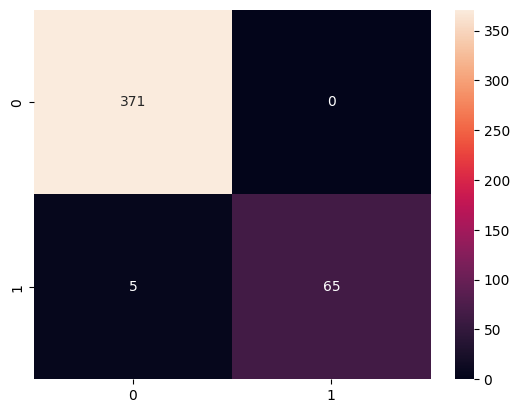

In [53]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Support Vector Machine

In [54]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [55]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [56]:
print('Best estimator is :',grid_search.best_estimator_)
print('Best parameter is :',grid_search.best_params_)
print('Best score is :',grid_search.score(X_train,y_train))
best=grid_search.best_estimator_
y_pred = best.predict(X_test)


Best estimator is : SVC(C=1, degree=2, kernel='linear')
Best parameter is : {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best score is : 0.8833819241982507


In [57]:
y_pred = svc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
score1= cross_val_score(SVC(), X, y, cv=2).mean()*100
print(score1)

0.8662131519274376
[[364   7]
 [ 52  18]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       371
           1       0.72      0.26      0.38        70

    accuracy                           0.87       441
   macro avg       0.80      0.62      0.65       441
weighted avg       0.85      0.87      0.84       441

85.578231292517


<span style = "color:orange"> Visualize confusion matrix </span>

<Axes: >

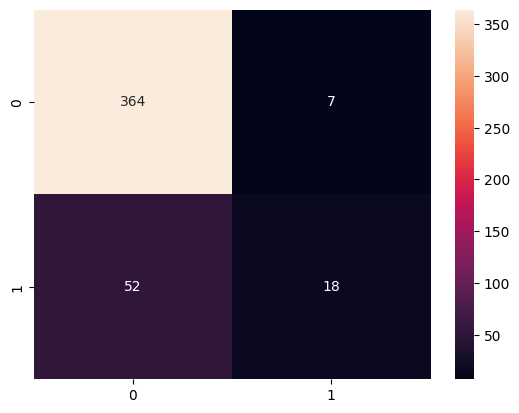

In [58]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### AdaBoost: Classifier

In [59]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)

C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [60]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.1, 0.5, 1, 2],
    'algorithm': ['SAMME', 'SAMME.R']
}
grid_search = GridSearchCV(abc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.5, 1, 2],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy')

In [61]:
print('best estimator is ',grid_search.best_estimator_)
print('best parameter is ',grid_search.best_params_)
best=grid_search.best_estimator_
y_pred = best.predict(X_test)

best estimator is  AdaBoostClassifier(learning_rate=0.1, n_estimators=500)
best parameter is  {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 500}


In [62]:
y_pred = abc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
score2 = cross_val_score(abc, X, y, cv=5, scoring='accuracy')*100
score2=np.average(score2)
print(score2)

0.8775510204081632
[[358  13]
 [ 41  29]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       371
           1       0.69      0.41      0.52        70

    accuracy                           0.88       441
   macro avg       0.79      0.69      0.72       441
weighted avg       0.86      0.88      0.86       441



C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

87.0748299319728


<span style = "color:orange"> Visualize confusion matrix </span>

<Axes: >

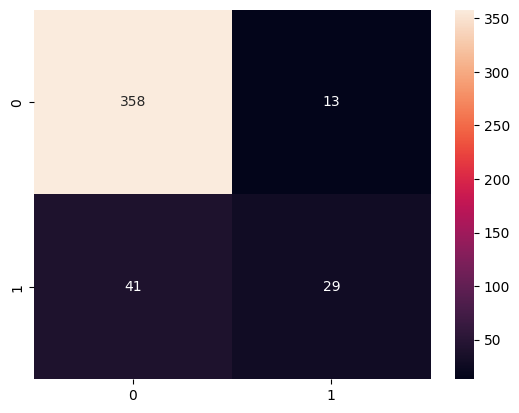

In [63]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### View score of different models in one dataframe

In [64]:
new_df = pd.DataFrame({'model': ['LogisticRegression','RandomForestClassifier','SupportVectorClassifier','AdaBoost'], 
                   'score': [scores,score,score1,score2]}) 
new_df

,model,score
0,LogisticRegression,86.598639
1,RandomForestClassifier,85.441262
2,SupportVectorClassifier,85.578231
3,AdaBoost,87.074830


## Use PCA to reduce dimensionality of the data

#### Import PCA and fit our X_train

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X_train)

PCA(n_components=0.95)

#### Apply the mapping (transform) to both the training set and the test set.

In [68]:
train_X = pca.transform(X_train)
test_X = pca.transform(X_test)

#### Import machine learning model of our choice, we are going with RandomForest for this problem

In [70]:
from sklearn.ensemble import RandomForestClassifier
rrc = RandomForestClassifier()

#### Create RandomForest model with the best parameter we got earlier and train it

In [72]:
rrc.fit(X_train,y_train)

RandomForestClassifier()

#### Check the score of our model

In [ ]:
rrc.score()

#### Make predictions with X_test and check the accuracy score

### Print Confusion matrix and Classification report

# <span style = "color:green"> Good Job! You have Successfully completed one Capstone Project </span>

***